In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

### Explore Case 03

In [2]:
n_case = "03"

In [6]:
path_brain_growth_casex = 'data/Training/case' + n_case

list_casex = os.listdir(path_brain_growth_casex)
list_casex.sort()

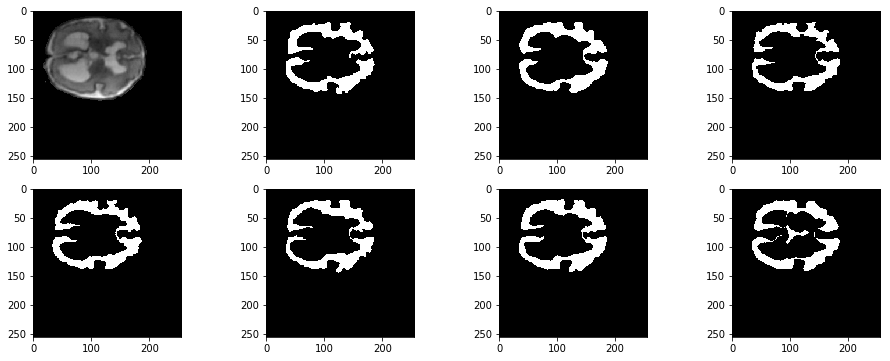

In [7]:
fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,6))
seg_final = np.zeros((256,256))

for idx, file in enumerate(list_casex):
    filename = os.path.join(path_brain_growth_casex, file)
    img = nib.load(filename)
    data = img.get_fdata()
    
    if idx>0:
        seg_final += data
    
    if idx < 4:
        axarr[0, idx].imshow(data, cmap = 'gray')
        axarr[0, idx].imshow(data, cmap = 'gray')
    else:
        axarr[1, idx-4].imshow(data, cmap = 'gray')

In [8]:
# percentage of votes of specialists by pixels 
for votes in np.unique(seg_final):
    num_pixels = (seg_final == votes).sum()
    print("nº by pixels: {} -- per: {}%".format(int(votes), np.round(num_pixels/(65536)*100, 2)))

nº by pixels: 0 -- per: 86.83%
nº by pixels: 1 -- per: 1.72%
nº by pixels: 2 -- per: 1.0%
nº by pixels: 3 -- per: 0.76%
nº by pixels: 4 -- per: 0.82%
nº by pixels: 5 -- per: 0.85%
nº by pixels: 6 -- per: 1.37%
nº by pixels: 7 -- per: 6.64%


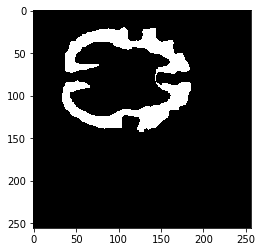

In [9]:
# selecting minimum 4 votes 
seg_final2 = (seg_final >= 4).astype(int)
plt.imshow(seg_final2, cmap = 'gray')
plt.show()

## Generalizing

In [12]:
path_brain_growth = 'data/Training/'

X = []
Y = []

for case in os.listdir(path_brain_growth):
    
    path_brain_growth_case = os.path.join(path_brain_growth, case)
    list_casex = os.listdir(path_brain_growth_case)
    list_casex.sort()

    labx = np.zeros((256,256))

    for idx, file in enumerate(list_casex):
        filename = os.path.join(path_brain_growth_case, file)
        nib_img = nib.load(filename)
        img_np = nib_img.get_fdata()

        if idx>0:
            labx += img_np
        else:
            imgx = img_np
            
    labx = (labx >= 4).astype(int)
    X.append(imgx)
    Y.append(labx)

In [13]:
Xa = np.asarray(X)
Xa.shape

(34, 256, 256)

In [14]:
Ya = np.asarray(Y)
Ya.shape

(34, 256, 256)

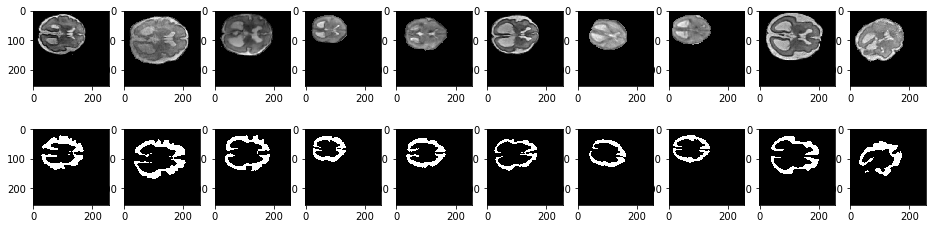

In [15]:
fig, axarr = plt.subplots(nrows=2, ncols=10, figsize=(16,4))

for i in range(10):
    axarr[0, i].imshow(X[i], cmap = 'gray')
    axarr[1, i].imshow(Y[i], cmap = 'gray')

In [16]:
Xa.max()

1486.0

In [17]:
# Normalization
X_train = Xa/Xa.max()

In [18]:
np.save('data/X_train.npy', X_train)
np.save('data/Y_train.npy', Ya)

### For Validation

In [19]:
path_brain_growth = 'data/Validation/'

X_val = []
Y_val = []

aux_lst = os.listdir(path_brain_growth)
aux_lst.sort()

for case in aux_lst:
    
    print(case)
    
    path_brain_growth_case = os.path.join(path_brain_growth, case)
    list_casex = os.listdir(path_brain_growth_case)
    list_casex.sort()

    labx = np.zeros((256,256))

    for idx, file in enumerate(list_casex):
        filename = os.path.join(path_brain_growth_case, file)
        nib_img = nib.load(filename)
        img_np = nib_img.get_fdata()

        if idx>0:
            labx += img_np
            
        else:
            imgx = img_np
            
    labx = (labx >= 4).astype(int)
    X_val.append(imgx)
    Y_val.append(labx)

X_val = np.asarray(X_val)
Y_val = np.asarray(Y_val)

case35
case36
case37
case38
case39


In [20]:
X_val.shape

(5, 256, 256)

In [21]:
Y_val.shape

(5, 256, 256)

In [22]:
X_val.max()

1338.0

In [23]:
# Normalization
X_val = X_val/Xa.max()

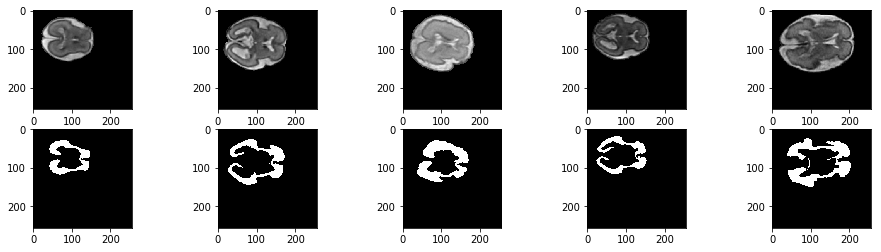

In [24]:
fig, axarr = plt.subplots(nrows=2, ncols=5, figsize=(16,4))

for i in range(5):
    axarr[0, i].imshow(X_val[i], cmap = 'gray')
    axarr[1, i].imshow(Y_val[i], cmap = 'gray')

In [25]:
np.save('data/X_val.npy', X_val)
np.save('data/Y_val.npy', Y_val)